In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\srish\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### not treating the outliers

In [6]:
X = df.drop(["Outcome"],axis=1)
y = df.Outcome

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

#### Tree based models are not distance based models and can handle varying ranges of features. Hence, Scaling is not required while modelling trees.

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
RF = RandomForestClassifier()

In [10]:
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
y_pred = RF.predict(x_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[88 11]
 [17 38]]


In [13]:
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Accuracy: 0.8181818181818182


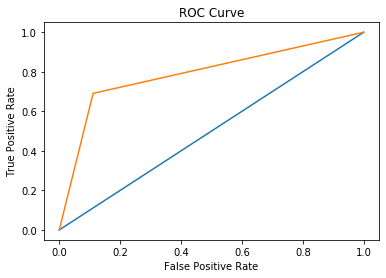

In [14]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [15]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        99
           1       0.78      0.69      0.73        55

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



### Hyper Parameter tuning

###### Using Gini Index

In [16]:
from sklearn import model_selection

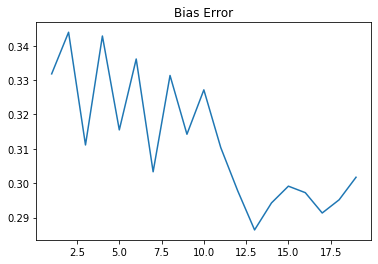

best n_estimator based on bias error =  13


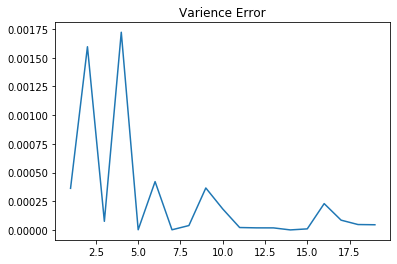

best n_estimator based on variance error =  14


In [62]:
RF_bias=[]
RF_var=[]
for val in np.arange(1,20):
    RF_h=RandomForestClassifier(criterion='gini',n_estimators=val,random_state=0)
    kfold = model_selection.KFold(shuffle=True,n_splits=2,random_state=0)
    cv_results = model_selection.cross_val_score(RF_h, x_train, y_train,cv=kfold, scoring='f1_weighted')
    RF_var.append(np.var(cv_results,ddof=1))
    RF_bias.append(1-np.mean(cv_results))    
x_axis=np.arange(1,20)
plt.plot(x_axis,RF_bias)
plt.title('Bias Error')
plt.show()
print('best n_estimator based on bias error = ',(np.argmin(RF_bias)+1))
plt.plot(x_axis,RF_var)
plt.title('Varience Error')
plt.show()
print('best n_estimator based on variance error = ',(np.argmin(RF_var)+1))

In [63]:
RF_h.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [64]:
pred_h = RF_h.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
print("Accuracy :",accuracy_score(y_test,pred_h))

Accuracy : 0.8051948051948052


In [67]:
RF_h.score(x_test,y_test)

0.8051948051948052

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
print(confusion_matrix(y_test, pred_h))

[[86 13]
 [17 38]]


###### Using Entropy Index

In [25]:
from sklearn import model_selection

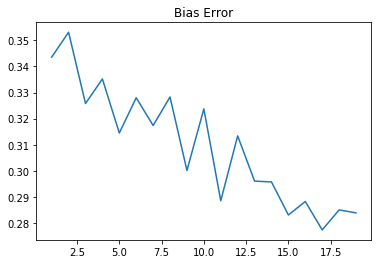

best n_estimator based on bias error =  17


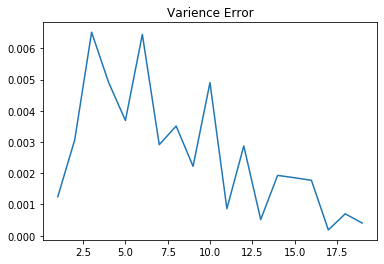

best n_estimator based on variance error =  17


In [33]:
RF_bias=[]
RF_var=[]
for val in np.arange(1,20):
    RF_E=RandomForestClassifier(criterion='entropy',n_estimators=val,random_state=0)
    kfold = model_selection.KFold(shuffle=True,n_splits=2,random_state=0)
    cv_results = model_selection.cross_val_score(RF_E, x_train, y_train,cv=kfold, scoring='f1_weighted')
    RF_var.append(np.var(cv_results,ddof=1))
    RF_bias.append(1-np.mean(cv_results))    
x_axis=np.arange(1,20)
plt.plot(x_axis,RF_bias)
plt.title('Bias Error')
plt.show()
print('best n_estimator based on bias error = ',(np.argmin(RF_bias)+1))
plt.plot(x_axis,RF_var)
plt.title('Varience Error')
plt.show()
print('best n_estimator based on variance error = ',(np.argmin(RF_var)+1))

In [34]:
RF_E.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
pred_e = RF_E.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score

print("Accuracy :",accuracy_score(y_test,pred_e))

Accuracy : 0.8181818181818182


In [37]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, pred_e))

[[87 12]
 [16 39]]


### From Above hyper parameter tuning we can say that with criterian "entropy" and n_estimator based on bias and variance, accuracy is higher comparing to "gini"